# Богданов Александр Иванович, Б05-003

## Задача 4.1

Рассмотрим данные из таблицы по числу заболевших и выздоровевших от короновируса в разных странах. Требуется проверить гипотезу о том, что число выздоровевших людей в странах не зависит от числа заболевших в стране.

Требуется:

1. записать задачу формально;
2. предложить статистику для решения данной задачи;
3. записать приближенно нулевое распределение данной статистики;
4. записать явно правило принятия решения на основе статистики и нулевого распределения для обеспечения уровня значимости $\alpha = 0.05$;
5. проверить гипотезу по записанному критерию, для данных из условия. Противоречат ли они гипотезу?
6. на уровне значимости alpha = 0.05 найти зависимость мощности критерия в зависимости от истинного значения статистики.

## Решение|

In [17]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata
from scipy.stats import t
from matplotlib import pyplot as plt

Загрузим данные.

In [2]:
data = pd.read_csv('data/corona.csv')
data

,Страна,заболевшие,выздоровевшие
0,германия,2078,25
1,дания,617,1
2,малайзия,149,26
3,австрия,302,4
4,ирак,71,15
5,китай,80932,62901
6,италия,12462,1045
7,сша,1663,12
8,сингапур,178,96
9,австралия,128,21


In [3]:
sick = data['заболевшие']
recovered = data['выздоровевшие']

Посмотрим на данные для того, чтобы понять какую корреляцию использовать

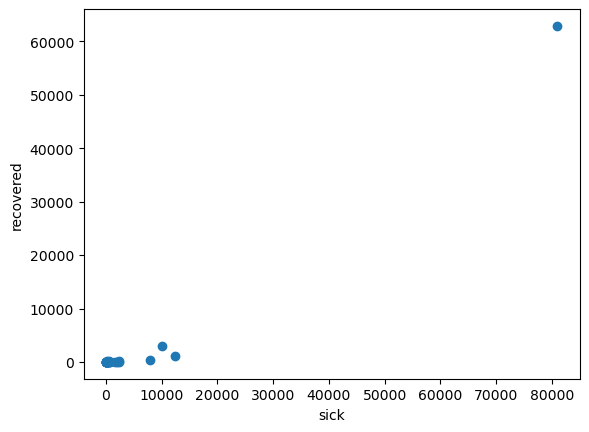

In [5]:
plt.scatter(sick, recovered)
plt.xlabel('sick')
plt.ylabel('recovered')
plt.show()

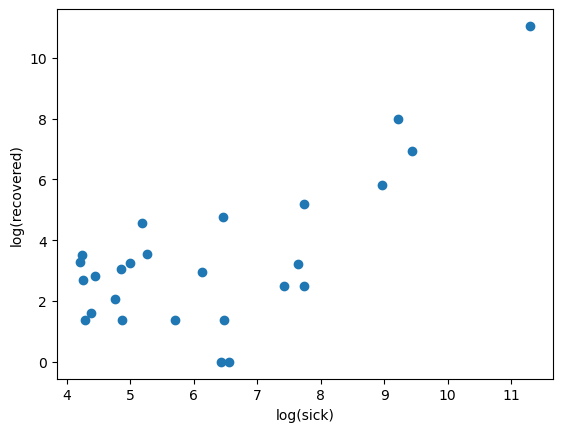

In [8]:
plt.scatter(np.log(sick), np.log(recovered))
plt.xlabel('log(sick)')
plt.ylabel('log(recovered)')
plt.show()

Линейная зависимость не прослеживается, поэтому исследовать корреляцию Пирсона не нужно. Будем исследовать корреляцию Спирмена, так как она прослеживается.

Воспользуемся критерием Стьюдента.

Пусть даны две выборки: $X_1 = (x_{11}, \dots, x_{1n})$, $X_2 = (x_{21}, \dots, x_{2n})$, n = 26.

Тогда ставится гипотеза и альтернатива:

$$
\begin{equation*}
    \begin{cases}
        H_0: \  \rho_{X_1 X_2} = 0 \\
        H_1: \  \rho_{X_1 X_2} \not = 0
    \end{cases}
\end{equation*}
$$

Возьмем статистику: $T = \frac{\hat{\rho}_{X_1 X_2} \sqrt{n - 2}}{\sqrt{1 - \hat{\rho^2}_{X_1 X_2}}} \sim St(n - 2)$, где $\hat{\rho}_{X_1 X_2} = 1 - \frac{6}{n^3 - n}\sum\limits_{i = 1}^n (X_{1i} - X_{2i})^2$.

Для проверки гипотезы на уровне значимости $\alpha$: $\tilde{T}_1 = St_{\frac{\alpha}{2}}(n - 2)$, $\tilde{T}_2 = St_{1 - \frac{\alpha}{2}}(n - 2)$:

$$
\begin{equation*}
    \begin{cases}
        |T| < St_{1 - \frac{\alpha}{2}}(n - 2)\ \text{не отклоняем}\ H_0 \\
        |T| \geq St_{1 - \frac{\alpha}{2}}(n - 2)\ \text{отклоняем}\ H_0
    \end{cases}
\end{equation*}
$$

In [16]:
n = len(sick)
rho = 1 - 6 / (n**3 - n) * ((rankdata(sick) - rankdata(recovered))**2).sum()
T = rho * np.sqrt(n - 2) / (1 - rho**2)
T

2.1510216794727075

In [19]:
t_quantile = t.ppf(1 - 0.05 / 2, n - 2)
t_quantile

2.063898561628021

Теоретически мощность критерия не найти.